In [2]:
# Remember to update your path
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/runmin/Documents/Qishi/QishiQR')

from Backtesting.Vectorized.cross_compare import *
from Backtesting.Vectorized.models import *

from Utils.lm import gen_strategy, LM_model
from Utils.MajorContract_Offsets import MajorContracts
from Utils.MajorContract_split import MajorContracts


import warnings
warnings.filterwarnings(action='ignore')


from config import BuConfig

def Generate_Direction(mj, threshold = np.linspace(1,15,num=(15.-1)/2+1)):
    result = pd.DataFrame(index=mj.index)
    for thx in threshold:
        result[round(thx,1)] = mj['LastPrice'].diff().apply(lambda x: 2 if x > thx 
                                            else (1 if x < -thx else 0))
    return result
 

----

# 1. Price-change 

In [3]:

# ====== Initial Configuration - Bu 5min ========
params = BuConfig(frequency=5)

mj5 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_5, mj_test_5, ptb_5 = mj5.create_major_overlap()

PT_5 = Generate_Direction(mj_train_5)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_5 = PT_5.apply(pd.value_counts).T
Value_Prob_5 = Value_Prob_5.div(Value_Prob_5.sum(axis=1), axis=0)

bu1606 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [4]:
# ====== Initial Configuration - Bu 15min ========
params = BuConfig(frequency=10)

mj10 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_10, mj_test_10, ptb_10 = mj10.create_major_overlap()

PT_10 = Generate_Direction(mj_train_10)
Frequency_Count = PT_10.apply(pd.value_counts).T

Value_Prob_10 = PT_10.apply(pd.value_counts).T
Value_Prob_10 = Value_Prob_10.div(Value_Prob_10.sum(axis=1), axis=0)

bu1606 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [5]:
# ====== Initial Configuration - Bu 15min ========
params = BuConfig(frequency=15)

mj15 = MajorContracts(symbol=params.symbol, split_time=params.split, topdir=params.tick_path, 
                       maturity=params.maturity, 
                       transitions=params.transition,
                       freq=params.frequency, offset=params.offset)

mj_train_15, mj_test_15, ptb_15 = mj15.create_major_overlap()

PT_15 = Generate_Direction(mj_train_15)
Frequency_Count = PT_5.apply(pd.value_counts).T

Value_Prob_15 = PT_15.apply(pd.value_counts).T
Value_Prob_15 = Value_Prob_15.div(Value_Prob_15.sum(axis=1), axis=0)

bu1606 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160229.0 20160630.0
bu1612 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
probability table:  20160701.0 20160729.0
bu1706 /home/runmin/Documents/Qishi/tick2016//bu
0
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


## 1.1 Compare the probability of price change

Text(0.5,0,'Price threshold')

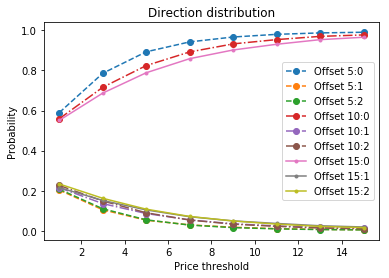

In [6]:
fig = plt.figure()
ax = plt.gca()
Value_Prob_5.plot(ax = ax, marker='o', style='--')
legend_5 = ['Offset 5:{}'.format(x) for x in [0,1,2]]
Value_Prob_10.plot(ax = ax, marker='o', style='-.')
legend_10 = ['Offset 10:{}'.format(x) for x in [0,1,2]]
Value_Prob_15.plot(ax = ax, marker='.')
legend_15 = ['Offset 15:{}'.format(x) for x in [0,1,2]]

plt.legend(legend_5+legend_10+legend_15)
ax.set_title('Direction distribution')
ax.set_ylabel('Probability')
ax.set_xlabel('Price threshold')

-----

# 2. Check the probability table

In [7]:
ptb_5_df = pd.concat(ptb_5)
ptb_5_df.index = ptb_5_df.index.droplevel(level=0)
ptb_5_df['len'] = ptb_5_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_5_df[ptb_5_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.44444444 0.44444444 0.11111111]

Prior length:4 	0,1,2: [0.4691358  0.44444444 0.08641975]

Prior length:5 	0,1,2: [0.43209877 0.41975309 0.14814815]

Prior length:6 	0,1,2: [0.39231824 0.34430727 0.26337449]

Prior length:7 	0,1,2: [0.39689072 0.3388203  0.26428898]

Prior length:8 	0,1,2: [0.55647005 0.25026673 0.19326322]


In [8]:
ptb_10_df = pd.concat(ptb_10)
ptb_10_df.index = ptb_10_df.index.droplevel(level=0)
ptb_10_df['len'] = ptb_10_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_10_df[ptb_10_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.33333333 0.33333333 0.33333333]

Prior length:3 	0,1,2: [0.48148148 0.37037037 0.14814815]

Prior length:4 	0,1,2: [0.44444444 0.41975309 0.13580247]

Prior length:5 	0,1,2: [0.45679012 0.38271605 0.16049383]

Prior length:6 	0,1,2: [0.38545953 0.32647462 0.28806584]

Prior length:7 	0,1,2: [0.46593507 0.29721079 0.23685414]

Prior length:8 	0,1,2: [0.67245847 0.17878372 0.14875781]


In [9]:
ptb_15_df = pd.concat(ptb_15)
ptb_15_df.index = ptb_15_df.index.droplevel(level=0)
ptb_15_df['len'] = ptb_15_df.prior.apply(len)

for prior_len in range(2, params.max_model_order+2):
    tmp = ptb_15_df[ptb_15_df['len']==prior_len].loc[:,'max'].value_counts()
    print('='*50)
    print()
    print('Prior length:{}'.format(prior_len),'\t0,1,2:',tmp.values/tmp.values.sum())


Prior length:2 	0,1,2: [0.44444444 0.33333333 0.22222222]

Prior length:3 	0,1,2: [0.48148148 0.40740741 0.11111111]

Prior length:4 	0,1,2: [0.43209877 0.40740741 0.16049383]

Prior length:5 	0,1,2: [0.43621399 0.36625514 0.19753086]

Prior length:6 	0,1,2: [0.36213992 0.34430727 0.29355281]

Prior length:7 	0,1,2: [0.52674897 0.25925926 0.21399177]

Prior length:8 	0,1,2: [0.73144338 0.14296601 0.12559061]


# 3. Check the generated signal

In [10]:
params = BuConfig(frequency=5)

slm_5 = ptb_5_df.groupby(['prior']).sum().reset_index()
slm_5['signal'] = slm_5.loc[:, '0':'2'].idxmax(axis=1)

signal_5 = MajorSeriesTest(mj_test_5, params.output_path, slm_5)
signal_5.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_5.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 5min
Prior length:2 	0,1,2: [0.56985743 0.21832994 0.21181263]
Prior length:3 	0,1,2: [0.53496266 0.23543788 0.22959946]
Prior length:4 	0,1,2: [0.5532926  0.24589274 0.20081466]
Prior length:5 	0,1,2: [0.5826205  0.20882553 0.20855397]
Prior length:6 	0,1,2: [0.61792261 0.19972845 0.18234895]
Prior length:7 	0,1,2: [0.6688391  0.18167006 0.14949084]


In [11]:
params = BuConfig(frequency=10)

slm_10 = ptb_10_df.groupby(['prior']).sum().reset_index()
slm_10['signal'] = slm_10.loc[:, '0':'2'].idxmax(axis=1)

signal_10 = MajorSeriesTest(mj_test_10, params.output_path, slm_10)
signal_10.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_10.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 10min
Prior length:2 	0,1,2: [0.5425275  0.24094446 0.21652804]
Prior length:3 	0,1,2: [0.5425275  0.26697075 0.19050174]
Prior length:4 	0,1,2: [0.53796619 0.24201771 0.2200161 ]
Prior length:5 	0,1,2: [0.55755299 0.22350416 0.21894285]
Prior length:6 	0,1,2: [0.60826402 0.2068688  0.18486719]
Prior length:7 	0,1,2: [0.68365978 0.16045076 0.15588946]


In [12]:
params = BuConfig(frequency=15)

slm_15 = ptb_15_df.groupby(['prior']).sum().reset_index()
slm_15['signal'] = slm_15.loc[:, '0':'2'].idxmax(axis=1)

signal_15 = MajorSeriesTest(mj_test_15, params.output_path, slm_15)
signal_15.build( params.max_model_order, params.offset, params.start.strftime("%Y%m%d"), params.end.strftime("%Y%m%d"), params.tca)

print('Interval time {}min'.format(params.frequency))
for model_order in range(1, params.max_model_order):
    tmp = signal_15.signals[model_order].signal.value_counts()
    print('='*50)
    print('Prior length:{}'.format(model_order+1),'\t0,1,2:',tmp.values/tmp.values.sum())

Interval time 15min
Prior length:2 	0,1,2: [0.52878966 0.36271054 0.1084998 ]
Prior length:3 	0,1,2: [0.49353702 0.29925578 0.20720721]
Prior length:4 	0,1,2: [0.524481  0.2875049 0.1880141]
Prior length:5 	0,1,2: [0.55660008 0.22600862 0.2173913 ]
Prior length:6 	0,1,2: [0.60086173 0.19976498 0.19937329]
Prior length:7 	0,1,2: [0.68664316 0.15902859 0.15432824]


----
# Backtest

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.234805,0.013254,-0.002151,0.001780,0.000314,-0.017252,0.013178,-0.032145,0.827439,14.112055,2491,1.782005,0.505821
1,0.234805,0.013254,-0.002396,0.001744,0.000426,-0.017252,0.013178,-0.032145,0.727975,14.112055,1836,1.782005,0.622004
2,0.234805,0.013254,-0.002509,0.001725,0.000483,-0.021433,0.013178,-0.032145,0.687503,14.112055,1618,1.782005,0.681088
3,0.246529,0.011218,-0.002624,0.001766,0.000387,-0.023749,0.013178,-0.044870,0.673031,11.376043,1710,1.661868,0.605848
4,0.241711,0.005857,-0.002257,0.001813,0.000180,-0.018019,0.012637,-0.061356,0.803271,6.058200,1916,1.345583,0.495825
5,0.227679,0.005336,-0.002162,0.001933,0.000144,-0.015909,0.014847,-0.055844,0.893915,5.859168,2183,1.314827,0.450756
6,0.213104,0.005513,-0.002065,0.001967,0.000136,-0.014781,0.014847,-0.036037,0.952512,6.467903,2385,1.325287,0.428092


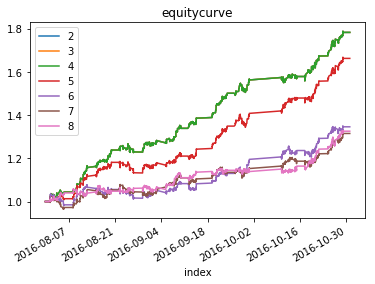

In [13]:
from config import BuConfig
params=BuConfig(frequency=5)

Bu_5_test = MajorSeriesTest(mj_test_5, params.output_path, slm_5 )
Bu_5_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Bu_5_test.run()
Bu_5_test.plot()
Bu_5_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.214912,0.003458,-0.003026,0.002150,0.000160,-0.020667,0.013178,-0.060844,0.710754,4.022792,1273,1.204032,0.506677
1,0.214912,0.003458,-0.003634,0.002123,0.000227,-0.027909,0.013178,-0.060844,0.584194,4.022792,898,1.204032,0.623608
2,0.209480,0.003604,-0.003233,0.002229,0.000211,-0.027909,0.011481,-0.069889,0.689500,4.300810,1006,1.212620,0.570577
3,0.255797,0.002269,-0.003128,0.002400,0.000120,-0.021242,0.014781,-0.092071,0.767067,2.217493,1115,1.133866,0.501345
4,0.233130,0.003206,-0.003008,0.002444,0.000174,-0.022156,0.017036,-0.064548,0.812273,3.438232,1086,1.189167,0.486188
5,0.222662,0.000666,-0.002787,0.002516,0.000031,-0.017858,0.015909,-0.094223,0.902788,0.747314,1248,1.039270,0.427885
6,0.237179,-0.000339,-0.002782,0.002530,-0.000017,-0.019286,0.015909,-0.106335,0.909460,-0.356978,1169,0.980018,0.417451


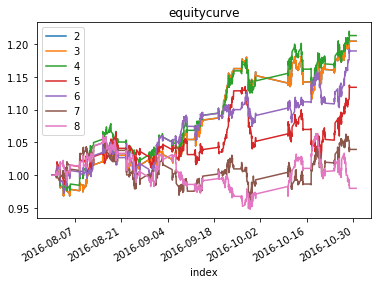

In [14]:
params=BuConfig(frequency=10)

Bu_10_test = MajorSeriesTest(mj_test_10, params.output_path, slm_10 )
Bu_10_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Bu_10_test.run()
Bu_10_test.plot()
Bu_10_test.performance

,Annualized Volatility,Average Daily Return,Average Negative Return,Average Positive Return,Average Return per Trade,Largest Losing Trade,Largest Winning Trade,Max Drawdown,Profit Factor,Sharpe Ratio,Total Number of Trades,Total Return,Winning Rate
0,0.228388,0.003849,-0.003406,0.002528,0.000249,-0.022347,0.012465,-0.046953,0.742279,4.212997,911,1.227079,0.508233
1,0.240157,0.001976,-0.004333,0.003087,0.000226,-0.023717,0.013911,-0.069044,0.712400,2.057170,516,1.116594,0.532946
2,0.193617,0.000315,-0.003561,0.002912,0.000026,-0.021555,0.014951,-0.102489,0.817711,0.406424,702,1.018571,0.451567
3,0.208966,-0.000185,-0.003541,0.002975,-0.000015,-0.029956,0.014951,-0.115021,0.839979,-0.221643,732,0.989069,0.427596
4,0.181504,-0.002545,-0.003283,0.003016,-0.000178,-0.018162,0.012461,-0.191998,0.918787,-3.505962,842,0.849822,0.376485
5,0.217078,-0.002066,-0.003234,0.002962,-0.000139,-0.018162,0.012465,-0.162985,0.915872,-2.378767,875,0.878135,0.376000
6,0.244234,-0.001064,-0.003312,0.003073,-0.000075,-0.033198,0.028235,-0.199171,0.927827,-1.088772,832,0.937244,0.382212


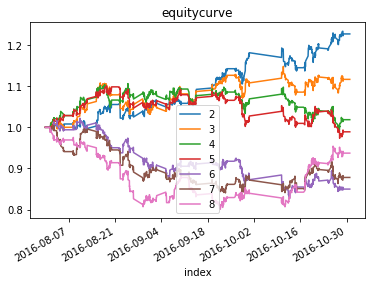

In [15]:
params=BuConfig(frequency=15)

Bu_15_test = MajorSeriesTest(mj_test_15, params.output_path, slm_15 )
Bu_15_test.build(model_order=params.max_model_order, freq=params.frequency, 
               start=params.start.strftime("%Y%m%d"), end=params.end.strftime("%Y%m%d"))

Bu_15_test.run()
Bu_15_test.plot()
Bu_15_test.performance